# Part of Speech Tagging

In [1]:
#Import packages
import spacy
import pandas as pd
import re
import os
import nltk
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
import altair as alt
import numpy as np
import statsmodels.api as sm

In [2]:
#Import nlp english dictionary
import en_core_web_sm

nlp = en_core_web_sm.load()


/opt/anaconda3/lib/python3.8/site-packages/spacy/util.py:833: UserWarning: [W095] Model 'en_core_web_sm' (3.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.2.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [3]:
# import clean scripts (character names are removed too)
all_scripts = pd.read_pickle('all_scripts_cleaned_total-99.pickle')

# Function words and hedges lists

In [5]:
#List of function words
functions = ['a','about ','above ','across ','after ','afterwards ','again ','against ','all','almost ','alone ','along ',
             'already ','also ','although ','always ','am ','among ','amongst ','amoungst ','an ','and ','another ','any ',
             'anyhow ','anyone ','anything ','anyway ','anywhere ','are ','around ','as ','at ','be ','became ','because ',
             'been ','before ','beforehand ','behind ','being ','below ','beside ','besides ','between ','beyond ','both ',
             'but ','by ','can ','cannot ','could ','dare ','despite ','did ','do ','does ','done ','down ','during ','each ',
             'eg ','either ','else ','elsewhere ','enough ','etc ','even ','ever ','every ','everyone ','everything ','everywhere ',
             'except ','few ','first ','for ','former ','formerly ','from ','further ','furthermore ','had ','has ','have ','he ',
             'hence ','her ','here ','hereabouts ','hereafter ','hereby ','herein ','hereinafter ','heretofore ','hereunder ','hereupon ','herewith ',
             'hers ','herself ','him ','himself ','his ','how ','however ','i ','ie ','if ','in ','indeed ','inside ','instead ','into ','is ','it ',
             'its ','itself ','last ','latter ','latterly ','least ','less ','lot ','lots ','many ','may ','me ','meanwhile ','might ','mine ',
             'more ','moreover ','most ','mostly ','much ','must ','my ','myself ','namely ','near ','need ','neither ','never ',
             'nevertheless ','next ','no ','nobody ','none ','noone ','nor ','not ','nothing ','now ','nowhere ','of ','off ','often ','oftentimes ','on ',
             'once ','one ','only ','onto ','or ','other ','others  ','otherwise ','ought ','our ','ours ','ourselves ','out ','outside ','over ',
             'per ','perhaps ','rather ','re ','same ','second ','several ','shall ','she ','should  ','since ','so ','some ','somehow ','someone ',
             'something ','sometime ','sometimes ','somewhat ','somewhere ','still ','such ','than ','that ','the ','their ','theirs ','them ','themselves ',
             'then ','thence ','there ','thereabouts ','thereafter ','thereby ','therefore ','therein ','thereof ','thereon ','thereupon ','these ',
             'they ','third ','this ','those ','though ','through ','throughout ','thru ','thus ','to ','together ','too ','top','toward ','towards ',
             'under ','until ','up ','upon ','us ','used ','very ','via ','was ','we ','well ','were ','what ','whatever ','when ','whence ','whenever ',
             'where ','whereafter ','whereas ','whereby ','wherein ','whereupon ','wherever ','whether ','which ','while ','whither ','who','whoever ',
             'whole ','whom ','whose ','why ','whyever ','will ','with ','within ','without ','would ','yes ','yet','you ','your','yours ','yourself ','yourselves ']

In [6]:
#List of hedges
hedges = ['argely','generally','often','rarely','sometimes','frequently','occasionally','seldom','usually','most',
          'several','some','almost','practically','apparently','virtually','basically','approximately','roughly',
          'somewhat','somehow','partially','actually','like','something','someone','somebody','somewhere','think',
          'thinks','thought','believe','believed','believes','consider','considers','considered','assume','assumes',
          'assumed','understand','understands','understood','find','found','finds','appear','appears','appeared','seem',
          'seems','seemed','suppose','supposes','supposed','guess','guesses','guessed','estimate','estimates','estimated',
          'speculate','speculates','speculated','suggest','suggests','suggested','may','could','should','might','surely',
          'probably','likely','maybe','perhaps','unsure','probable','unlikely','possibly','possible','read','say','says',
          'looks like','look like','dont know','necessarily','kind of','much','bunch','couple','few','little','really',
          'and all that','and so forth','et cetera','in my mind','in my opinion','their impression','my impression',
          'in my understanding','my thinking is','my understanding is','in my view','if im understanding you correctly',
          'something or other', 'so far','at least','about','around','can','effectively','evidently','fairly','hopefully',
          'in general','mainly','more or less','mostly','overall','presumably','pretty','quite clearly','quite','rather',
          'sort of','supposedly','tend','appear to be','doubt','be sure','indicate','will','must','would','certainly',
          'definitely','clearly','conceivably','certain','definite','clear','assumption','possibility','probability',
          'many','almost never','improbable','always','like']

In [7]:
#Assigning function words
def word_checker(sentence):
    if any(word in functions for word in sentence.lower().split()):
        return 1
    else:
        return 0
all_scripts['Function_words'] = all_scripts['Clean_Line_all'].apply(word_checker)  

In [8]:
#Assigning hedges
def word_checker1(sentence):
    if any(word in hedges for word in sentence.lower().split()):
        return 1
    else:
        return 0
all_scripts['Hedges'] = all_scripts['Clean_Line_all'].apply(word_checker1) 

In [9]:
#Create data set of hedges and function words mean for men and women 
mean_hedges = all_scripts[['Hedges', 'Gender']].groupby('Gender').mean()*100
mean_hedges = mean_hedges.reset_index()
mean_hedges = mean_hedges.iloc[::-1]
mean_func = all_scripts[['Function_words','Gender']].groupby('Gender').mean()*100
mean_func = mean_func.reset_index()
mean_func = mean_func.iloc[::-1]

In [10]:
#Set colors
colors = ["#3e1e58", "#fce43c", "#98c862", "#4c8e70"]

/var/folders/f1/s37s84893rx20wc3fwvjlf2m0000gn/T/ipykernel_17728/2397782359.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['Men', 'Women'], fontsize=12, rotation=0)
/var/folders/f1/s37s84893rx20wc3fwvjlf2m0000gn/T/ipykernel_17728/2397782359.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['Men', 'Women'], fontsize=12, rotation=0)


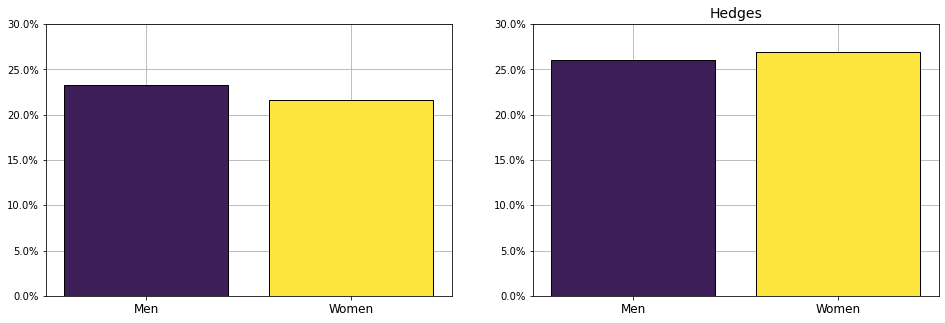

In [11]:
# plot figure of subplots 
fig1, [ax1, ax2] = plt.subplots(1, 2, figsize = (16, 5))

# plot 1 - function words
ax1.bar(mean_func['Gender'], mean_func['Function_words'],edgecolor='black', 
        color = colors, zorder = 3)

# plot 2 - hedges
ax2.bar(mean_hedges['Gender'], mean_hedges['Hedges'],edgecolor='black', 
        color = colors, zorder = 3)

# formatting
import matplotlib.ticker as mtick
ax1.yaxis.set_major_formatter(mtick.PercentFormatter()) # set percentage at yaxis.
ax2.yaxis.set_major_formatter(mtick.PercentFormatter()) # set percentage at yaxis.

ax1.set_xticklabels(['Men', 'Women'], fontsize=12, rotation=0)
ax1.set_ylim([0, 30])

ax2.set_xticklabels(['Men', 'Women'], fontsize=12, rotation=0)
ax2.set_ylim([0, 30])

#ax1.set_title("Proportion of lines using function words", fontsize = 14)
ax2.set_title("Hedges", fontsize = 14)


ax1.grid(True)
ax2.grid(True)

#plt.show()
plt.savefig('hedges and func word gender.png',bbox_inches='tight')

In [12]:
# create for loop for testing z-test
import statsmodels.api as sm

# list of columns we want to test 
test_list = ['Hedges','Function_words']
z_test_results = []
m_mean = []
w_mean = []

for column in test_list:
    column = column
    male = all_scripts.query('Gender == "Male"')[column] 
    male = sm.stats.DescrStatsW(male)
    male_mean = all_scripts.loc[all_scripts['Gender'] == 'Male'][column].mean()
    m_mean.append(male_mean)
    female = all_scripts.query('Gender == "Female"')[column]
    female = sm.stats.DescrStatsW(female)
    female_mean = all_scripts.loc[all_scripts['Gender'] == 'Female'][column].mean()
    w_mean.append(female_mean)
    z_test = sm.stats.CompareMeans(male, female).ztest_ind(usevar='unequal',value=0)
    z_test_results.append(z_test)
    
test_df = pd.DataFrame(
    {'Speech element': test_list,
     'Mean for men': m_mean,
     'Mean for women': w_mean,
     'Z_test': z_test_results,
    })



In [13]:
test_df

,Speech element,Mean for men,Mean for women,Z_test
0,Hedges,0.260447,0.268618,"(-1.7955310094748733, 0.07256913671629474)"
1,Function_words,0.232330,0.215688,"(3.893448454865004, 9.882920934427026e-05)"


### Looking at function words and hedges for most speaking characters

In [14]:
# subsetting data to only include most speaking male and female character

# save number of lines 
lines = all_scripts.groupby(["Era", "Movie", "Gender", "Character"]).count()['Line'].to_frame().reset_index()
# save number of words
words = all_scripts.groupby(["Era", "Movie", "Gender", "Character"]).sum()['Words_n'].to_frame().reset_index()

lines['Words_n'] = words['Words_n']
lines['Words_pr_line'] = lines['Words_n']/lines['Line'].round()

# find characters using the largest share of words 
top5_words = lines.groupby(["Movie", "Gender", "Character"])\
.agg({"Words_n" : "sum"})\
.groupby(level=0).apply(lambda x: 100*x/x.sum())\
.sort_values(by=["Movie", "Gender", "Words_n"], ascending=[True, True, False]).reset_index()

top_words_f = top5_words.loc[top5_words['Gender'] == "Female"].groupby('Movie').head(1)
top_words_m = top5_words.loc[top5_words['Gender'] == "Male"].groupby('Movie').head(1)

top_words_f = dict(zip(top_words_f.Movie, top_words_f.Character))
top_words_m = dict(zip(top_words_m.Movie, top_words_m.Character))

leading_character = []

for index, row in all_scripts.iterrows():
    
    movie = row['Movie']
    name_f = top_words_f[movie]
    name_m = top_words_m[movie]
    if row['Character'] == name_f:
        leading_character.append(1)
    elif row['Character'] == name_m:
        leading_character.append(1)
    else:
        leading_character.append(0)

In [15]:
all_scripts['Leading_character'] = leading_character
all_scripts_lead = all_scripts.loc[all_scripts['Leading_character'] == 1].reset_index(drop=True)

In [16]:
mean_hedges1 = all_scripts_lead[['Hedges', 'Gender']].groupby('Gender').mean()*100
mean_hedges1 = mean_hedges1.reset_index()
mean_hedges1 = mean_hedges1.iloc[::-1]
mean_func1 = all_scripts_lead[['Function_words','Gender']].groupby('Gender').mean()*100
mean_func1 = mean_func1.reset_index()
mean_func1 = mean_func1.iloc[::-1]

In [17]:
#Set colors
colors = ["#3e1e58", "#fce43c", "#98c862", "#4c8e70"]

In [ ]:
# plot figure of subplots 
fig1, [ax1, ax2] = plt.subplots(1, 2, figsize = (16, 5))

# plot 1 - function words
ax1.bar(mean_func1['Gender'], mean_func1['Function_words'],edgecolor='black', 
        color = colors, zorder = 3)

# plot 2 - hedges
ax2.bar(mean_hedges1['Gender'], mean_hedges1['Hedges'],edgecolor='black', 
        color = colors, zorder = 3)

# formatting
import matplotlib.ticker as mtick
ax1.yaxis.set_major_formatter(mtick.PercentFormatter()) # set percentage at yaxis.
ax2.yaxis.set_major_formatter(mtick.PercentFormatter()) # set percentage at yaxis.

ax1.set_xticklabels(['Most speaking men', 'Most speaking women'], fontsize=12, rotation=0)
ax1.set_ylim([0, 30])

ax2.set_xticklabels(['Most speaking men', 'Most speaking women'], fontsize=12, rotation=0)
ax2.set_ylim([0, 30])

ax1.set_title("Proportion of lines using function words", fontsize = 14)
ax2.set_title("Hedges", fontsize = 14)


ax1.grid(True)
ax2.grid(True)

#plt.show()
plt.savefig('hedges and func word mspeak.png',bbox_inches='tight')

In [19]:
# create for loop for testing z-test
import statsmodels.api as sm

# list of columns we want to test 
test_list = ['Hedges','Function_words']
z_test_results = []
m_mean = []
w_mean = []

for column in test_list:
    column = column
    #testing significance share of FEMALE lines and writers gender by using a z-test 
    male = all_scripts_lead.query('Gender == "Male"')[column] #all_sentences is the dataframe
    male = sm.stats.DescrStatsW(male)
    male_mean = all_scripts_lead.loc[all_scripts_lead['Gender'] == 'Male'][column].mean()
    m_mean.append(male_mean)
    female = all_scripts_lead.query('Gender == "Female"')[column]
    female = sm.stats.DescrStatsW(female)
    female_mean = all_scripts_lead.loc[all_scripts_lead['Gender'] == 'Female'][column].mean()
    w_mean.append(female_mean)
    z_test = sm.stats.CompareMeans(male, female).ztest_ind(usevar='unequal',value=0)
    z_test_results.append(z_test)
    
test1_df = pd.DataFrame(
    {'Speech element': test_list,
     'Mean for men': m_mean,
     'Mean for women': w_mean,
     'Z_test': z_test_results,
    })



In [21]:
test1_df

,Speech element,Mean for men,Mean for women,Z_test
0,Hedges,0.274342,0.268190,"(0.8733255772922177, 0.38248564315247247)"
1,Function_words,0.239925,0.218141,"(3.2779181514175515, 0.0010457571363947761)"


## Function words across eras

In [14]:
#Adding letters to era to make sure they are alphabetically listed 
all_scripts['Era'] = all_scripts['Era'].replace({'The Golden Age': 'A The Golden Age', 'The Bronze Age': 'B The Bronze Age', 'The Disney Renaissance': 'C The Disney Renaissance', 
                               'Post Renaissance Era': 'D Post Renaissance Era','The Revival Era': 'E The Revival Era',
                               'Present period': 'F Present period'})

In [17]:
#Function words across Era - make mean dataframe for percentage
import matplotlib.ticker as mtick
df_women = all_scripts[all_scripts.Gender == 'Female']
df_men = all_scripts[all_scripts.Gender == 'Male']

mean_func_era_female = df_women[['Function_words','Era']].groupby('Era').mean()*100
mean_func_era_male = df_men[['Function_words','Era']].groupby('Era').mean()*100

,Function_words
Era,
A The Golden Age,23.152996
B The Bronze Age,24.421832
C The Disney Renaissance,21.250841
D Post Renaissance Era,23.948220
E The Revival Era,18.938119
F Present period,22.818396


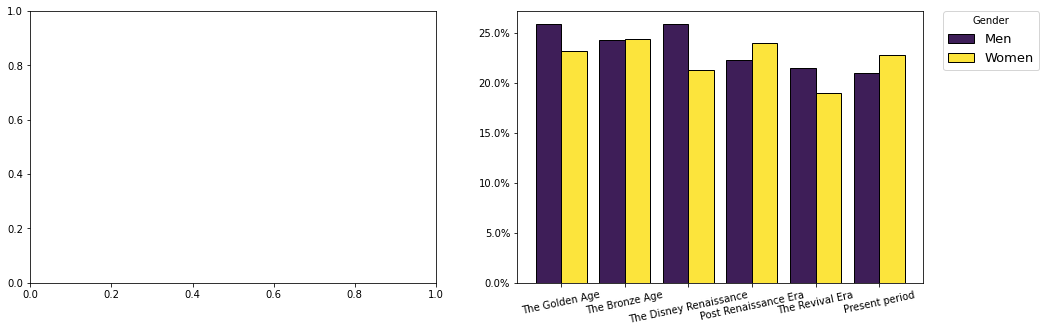

In [28]:
#Plotting function words for gender and era 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 5))
colors = ["#3e1e58", "#fce43c", "#98c862", "#4c8e70"]
xlabels = ['The Golden Age', 'The Bronze Age', 'The Disney Renaissance',
           'Post Renaissance Era', 'The Revival Era', 'Present period']
X = ['A The Golden Age', 'B The Bronze Age', 'C The Disney Renaissance', 
     'D Post Renaissance Era','E The Revival Era','F Present period']
#Mean function words for each era chronologically for men
Men = [25.889090,24.300203,25.895104,22.246331,21.521456,20.975354] 
#Mean function words for each era chronologically for women
Women = [23.152996,24.421832,21.250841,23.948220,18.938119,22.818396] 


X_axis = np.arange(len(X))

ax2.bar(X_axis - 0.2, Men, 0.4, label = 'Men', color ="#3e1e58",edgecolor='black', )
ax2.bar(X_axis + 0.2, Women, 0.4, label = 'Women',color ="#fce43c",edgecolor='black', )

# formatting
import matplotlib.ticker as mtick
ax2.yaxis.set_major_formatter(mtick.PercentFormatter()) # set percentage at yaxis.

#Setting ax labels
ax2.set_xticks(X_axis,xlabels, rotation = 12)

plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.,title='Gender', fontsize = 13)
#plt.show()
plt.savefig('function words for genderxera.png', bbox_inches='tight')

## Hedges across eras

In [29]:
#Hedges words across Era - mean dataset
import matplotlib.ticker as mtick
df_women = all_scripts[all_scripts.Gender == 'Female']
df_men = all_scripts[all_scripts.Gender == 'Male']

mean_hedg_era_female = df_women[['Hedges','Era']].groupby('Era').mean()*100
mean_hedg_era_male = df_men[['Hedges','Era']].groupby('Era').mean()*100

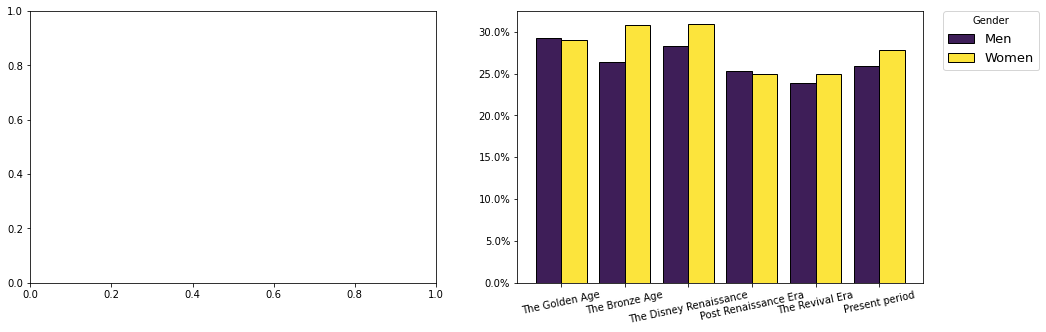

In [32]:
#Plotting hedges words for gender and era 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 5))
colors = ["#3e1e58", "#fce43c", "#98c862", "#4c8e70"]
xlabels = ['The Golden Age', 'The Bronze Age', 'The Disney Renaissance',
           'Post Renaissance Era', 'The Revival Era', 'Present period']
X = ['A The Golden Age', 'B The Bronze Age', 'C The Disney Renaissance', 
     'D Post Renaissance Era','E The Revival Era','F Present period']
#Mean hedges words for each era chronologically for men
Men = [29.234479,26.409736,28.294949,25.283982,23.836151, 25.957001]
#Mean hedges words for each era chronologically for women
Women = [29.028505,30.804810,30.934768,24.919094,24.957936,27.771226]


X_axis = np.arange(len(X))

ax2.bar(X_axis - 0.2, Men, 0.4, label = 'Men', color ="#3e1e58",edgecolor='black', )
ax2.bar(X_axis + 0.2, Women, 0.4, label = 'Women',color ="#fce43c",edgecolor='black', )

# formatting
import matplotlib.ticker as mtick
ax2.yaxis.set_major_formatter(mtick.PercentFormatter()) # set percentage at yaxis.

#Setting ax labels
ax2.set_xticks(X_axis,xlabels, rotation = 12)

plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.,title='Gender', fontsize = 13)
#plt.show()
plt.savefig('hedges for genderxera.png', bbox_inches='tight')

### Anova testing function words and hedges for era

In [25]:
import pingouin as pg
aov = pg.anova(data=all_scripts, dv='Function_words', between='Era', detailed=True)
aov1 = pg.anova(data=all_scripts, dv='Hedges', between='Era', detailed=True)
print('Function words is:',"\n","\n",aov)
print('Hedges is:',"\n","\n",aov1)


Function words is: 
 
    Source           SS     DF        MS          F         p-unc       np2
0     Era    13.404847      5  2.680969  15.313458  4.521033e-15  0.001799
1  Within  7438.666362  42489  0.175073        NaN           NaN       NaN
Hedges is: 
 
    Source           SS     DF        MS          F         p-unc       np2
0     Era    15.962653      5  3.192531  16.493864  2.649135e-16  0.001937
1  Within  8224.114909  42489  0.193559        NaN           NaN       NaN


# Part of speech tagging and testing

In [26]:
#Running nlp for clean character lines
wo_punc = []
for line in all_scripts['Clean_Line_all']:
    line = re.sub(r'[^\w\s]', '', line)
    wo_punc.append(line)
nlp.max_length = 1414850
all_scripts['Clean_Line_new'] = wo_punc
all_scripts['nlp_spacy'] = all_scripts.Clean_Line_new.apply(nlp)

In [27]:
#saving nlp dataset to pickle 
all_scripts.to_pickle('all_scripts_nlp.pickle')

In [ ]:
#Tagging each line with the amount of each part of speech tag it contains 
typ3common = {"Gender":[], "NOUN":[], "VERB":[], "ADJ":[], "PRON":[], "DET":[],
              "AUX":[], "ADV":[], "ADP":[], "INTJ":[], "PART":[], "CCONJ":[], "SCONJ":[],
              "PROPN":[], "NUM":[],
              "ELSE_WORD":[], "TOTAL":[], "TOTAL_ELSE":[],"Line_clean":[],"Era":[]}


for i in range(len(all_scripts)):
    typ3common["Gender"].append(all_scripts.Gender[i])
    typ3common["Line_clean"].append(all_scripts.Clean_Line_new[i])
    typ3common["Era"].append(all_scripts.Era[i])
    nouns = verbs = adjs = prons = dets = auxs = advs = intjs = parts = cconjs = 0
    propns = nums = adps = sconjs = else_word = 0
    for line in all_scripts.nlp_spacy[i]:
        typ = line.pos_
        if typ == "NOUN":
            nouns+=1
        if typ == "VERB":
            verbs+=1
        if typ == "ADJ":
            adjs+=1
        if typ == "PRON":
            prons+=1
        if typ == "ADP":
            adps+=1
        if typ == "DET":
            dets+=1
        if typ == "AUX":
            auxs+=1
        if typ == "ADV":
            advs+=1
        if typ == "INTJ":
            intjs+=1
        if typ == "PART":
            parts+=1
        if typ == "CCONJ":
            cconjs+=1
        if typ == "SCONJ":
            sconjs+=1
        if typ == "PROPN":
            propns+=1
        if typ == "NUM":
            nums+=1
            
        else:
            else_word+=1
    
#Populate with data
    total = nouns+verbs+adjs+prons+dets+auxs+advs+intjs+parts+cconjs+sconjs+nums+propns
    total_else = nouns+verbs+adjs+prons+dets+auxs+advs+intjs+parts+cconjs+sconjs+nums+propns+else_word
    total_wo_puncs = nouns+verbs+adjs+prons+dets+auxs+advs+intjs+parts+cconjs+sconjs+nums+propns+else_word
    
    typ3common["TOTAL"].append(total)
    typ3common["TOTAL_ELSE"].append(total_else)
    
    typ3common["NOUN"].append(float(nouns))
    typ3common["VERB"].append(float(verbs))
    typ3common["ADJ"].append(float(adjs))
    
    typ3common["PRON"].append(float(prons))
    typ3common["DET"].append(float(dets))
    typ3common["ADP"].append(float(adps))
    typ3common["AUX"].append(float(auxs))
    typ3common["ADV"].append(float(advs))
    typ3common["INTJ"].append(float(intjs))
    typ3common["PART"].append(float(parts))
    typ3common["CCONJ"].append(float(cconjs))
    typ3common["SCONJ"].append(float(sconjs))
    typ3common["NUM"].append(float(nums))
    typ3common["PROPN"].append(float(propns))
    
    typ3common["ELSE_WORD"].append(float(else_word))

df_words = pd.DataFrame.from_dict(typ3common)
df_words

In [29]:
#Saving
df_words.to_pickle('df_words.pickle')

In [80]:
#Re-loading data
df = pd.read_pickle('df_words.pickle')

In [96]:
#Making a new binary column for each class to see if the part of speech tag is present or not in the line
def pos_label (row):
    if row['NOUN'] > 0 :
        return 1
    if row['NOUN'] == 0 :
        return 0

df['NOUN']= df.apply (lambda row: pos_label(row), axis=1)

def pos_label1 (row):
    if row['VERB'] > 0 :
        return 1
    if row['VERB'] == 0 :
        return 0

df['VERB']= df.apply (lambda row: pos_label1(row), axis=1)

def pos_label2 (row):
    if row['ADJ'] > 0 :
        return 1
    if row['ADJ'] == 0 :
        return 0

df['ADJ']= df.apply (lambda row: pos_label2(row), axis=1)

def pos_label3 (row):
    if row['PRON'] > 0 :
        return 1
    if row['PRON'] == 0 :
        return 0

df['PRON']= df.apply (lambda row: pos_label3(row), axis=1)

def pos_label4 (row):
    if row['DET'] > 0 :
        return 1
    if row['DET'] == 0 :
        return 0
df['DET']= df.apply (lambda row: pos_label4(row), axis=1)

def pos_label5 (row):
    if row['AUX'] > 0 :
        return 1
    if row['AUX'] == 0 :
        return 0
df['AUX']= df.apply (lambda row: pos_label5(row), axis=1)

def pos_label6 (row):
    if row['ADV'] > 0 :
        return 1
    if row['ADV'] == 0 :
        return 0
df['ADV']= df.apply (lambda row: pos_label6(row), axis=1)

def pos_label7 (row):
    if row['ADP'] > 0 :
        return 1
    if row['ADP'] == 0 :
        return 0
df['ADP']= df.apply (lambda row: pos_label7(row), axis=1)

def pos_label8 (row):
    if row['INTJ'] > 0 :
        return 1
    if row['INTJ'] == 0 :
        return 0
df['INTJ']= df.apply (lambda row: pos_label8(row), axis=1)

def pos_label9 (row):
    if row['PART'] > 0 :
        return 1
    if row['PART'] == 0 :
        return 0
df['PART']= df.apply (lambda row: pos_label9(row), axis=1)

def pos_label10 (row):
    if row['CCONJ'] > 0 :
        return 1
    if row['CCONJ'] == 0 :
        return 0
df['CCONJ']= df.apply (lambda row: pos_label10(row), axis=1)

def pos_label11 (row):
    if row['SCONJ'] > 0 :
        return 1
    if row['SCONJ'] == 0 :
        return 0
df['SCONJ']= df.apply (lambda row: pos_label11(row), axis=1)

def pos_label12 (row):
    if row['PROPN'] > 0 :
        return 1
    if row['PROPN'] == 0 :
        return 0
df['PROPN']= df.apply (lambda row: pos_label12(row), axis=1)

def pos_label13 (row):
    if row['NUM'] > 0 :
        return 1
    if row['NUM'] == 0 :
        return 0
df['NUM']= df.apply (lambda row: pos_label13(row), axis=1)



In [32]:
# create for loop for testing z-test for gender and part of speeech tag
import statsmodels.api as sm

# list of columns we want to test 
test_list = ['NOUN','VERB','ADJ','PRON','DET','AUX','ADV','ADP','INTJ','PART','CCONJ','SCONJ','PROPN','NUM']

z_test_results = []
m_mean = []
w_mean = []

for column in test_list:
    column = column
    male = df.query('Gender == "Male"')[column] 
    male = sm.stats.DescrStatsW(male)
    male_mean = df.loc[df['Gender'] == 'Male'][column].mean()
    m_mean.append(male_mean)
    female = df.query('Gender == "Female"')[column]
    female = sm.stats.DescrStatsW(female)
    female_mean = df.loc[df['Gender'] == 'Female'][column].mean()
    w_mean.append(female_mean)
    z_test = sm.stats.CompareMeans(male, female).ztest_ind(usevar='unequal',value=0)
    z_test_results.append(z_test)
    
test_df = pd.DataFrame(
    {'Word class': test_list,
     'Mean for men': m_mean,
     'Mean for women': w_mean,
     'Z_test': z_test_results,
    })

In [33]:
test_df

,Word class,Mean for men,Mean for women,Z_test
0,NOUN,0.694384,0.673067,"(4.437994428224273, 9.080096911688926e-06)"
1,VERB,0.700585,0.693474,"(1.5006189206178095, 0.13345415472431227)"
2,ADJ,0.384363,0.362078,"(4.483694569150643, 7.3361648118824894e-06)"
3,PRON,0.689169,0.703181,"(-2.964746021756162, 0.0030293291220127557)"
4,DET,0.436474,0.413094,"(4.598672509239993, 4.251915543917845e-06)"
5,AUX,0.512191,0.529724,"(-3.4088292360588306, 0.000652423053938386)"
6,ADV,0.395568,0.394955,"(0.12165366521239594, 0.9031733103869888)"
7,ADP,0.383976,0.358393,"(5.154965635195069, 2.53677446689509e-07)"
8,INTJ,0.305475,0.274144,"(6.745061622836292, 1.5296209025561067e-11)"
9,PART,0.248115,0.250407,"(-0.5142213826885917, 0.607097219672079)"


In [34]:
#Anova testing for Era and part of speech tag 
import pingouin as pg
aov = pg.anova(data=df, dv='NOUN', between='Era', detailed=True)
aov1 = pg.anova(data=df, dv='VERB', between='Era', detailed=True)
aov2 = pg.anova(data=df, dv='ADJ', between='Era', detailed=True)
aov3 = pg.anova(data=df, dv='PRON', between='Era', detailed=True)
aov4 = pg.anova(data=df, dv='DET', between='Era', detailed=True)
aov5 = pg.anova(data=df, dv='AUX', between='Era', detailed=True)
aov6 = pg.anova(data=df, dv='ADV', between='Era', detailed=True)
aov7 = pg.anova(data=df, dv='ADP', between='Era', detailed=True)
aov8 = pg.anova(data=df, dv='INTJ', between='Era', detailed=True)
aov9 = pg.anova(data=df, dv='PART', between='Era', detailed=True)
aov10 = pg.anova(data=df, dv='CCONJ', between='Era', detailed=True)
aov11 = pg.anova(data=df, dv='SCONJ', between='Era', detailed=True)
aov12 = pg.anova(data=df, dv='PROPN', between='Era', detailed=True)
aov13 = pg.anova(data=df, dv='NUM', between='Era', detailed=True)
print('NOUN is:',"\n","\n",aov)
print('VERB is:',"\n","\n",aov1)
print('ADJ is:',"\n","\n",aov2)
print('PRON is:',"\n","\n",aov3)
print('DET is:',"\n","\n",aov4)
print('AUX is:',"\n","\n",aov5)
print('ADV is:',"\n","\n",aov6)
print('ADP is:',"\n","\n",aov7)
print('INTJ is:',"\n","\n",aov8)
print('PART is:',"\n","\n",aov9)
print('CCONJ is:',"\n","\n",aov10)
print('SCONJ is:',"\n","\n",aov11)
print('PROPN is:',"\n","\n",aov12)
print('NUM is:',"\n","\n",aov13)

NOUN is: 
 
    Source           SS     DF        MS          F         p-unc       np2
0     Era    25.580804      5  5.116161  23.868774  4.679892e-24  0.002801
1  Within  9107.319913  42489  0.214345        NaN           NaN       NaN
VERB is: 
 
    Source           SS     DF        MS         F         p-unc       np2
0     Era     7.651492      5  1.530298  7.267852  8.177167e-07  0.000855
1  Within  8946.364369  42489  0.210557       NaN           NaN       NaN
ADJ is: 
 
    Source           SS     DF        MS          F         p-unc       np2
0     Era    33.118775      5  6.623755  28.292699  9.782532e-29  0.003318
1  Within  9947.327018  42489  0.234115        NaN           NaN       NaN
PRON is: 
 
    Source           SS     DF        MS         F     p-unc      np2
0     Era     2.975099      5  0.595020  2.801507  0.015573  0.00033
1  Within  9024.353387  42489  0.212393       NaN       NaN      NaN
DET is: 
 
    Source            SS     DF        MS         F     p-u